# Linear Regression

In supervised learning, regression is the modelling and prediction of continuous variables. One of the basic techniques of regression is Linear Regression.

Linear regression is usually among the first few topics in learning predictive modeling. Here, the dependent variable (or target variable) is continuous while the independent variables (or predictors) can be continuous or discrete. The nature of regression line is linear, meaning it can be graphically represented as a line on the graph.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line.

It is represented by an equation Y=w*X + b, where b is intercept, w is slope of the line. This equation can be used to predict the value of target variable based on given predictor variable(s).

In Machine Learning using python, We can use couple of libraries for performing Linear Regression. One of them is statsmodels. This library has basic modules to perform Ordinary Least Square technique of Linear Regression. Alternatively, we could use another library known as sklearn (Scikit-Learn). This provides python implementations of various Machine Learning algorithms.  

In this demonstration notebook we would see an example of both a statsmodels based algorithm as well as a sklearn based model. We will jump right into code. At this point I would like to tell you that if you don't understand some of the concepts or code, don't panic. It is normal to not understand the details. The objective of this very course is to teach you to understand and implement this code. 

### Importing the libraries

Import the required libraries and initialize the code. Here we will be using:

Pandas, Numpy for data manipulation and arrays <br>
Matplotlib, Seaborn, Pyplot and BQplot for visualizations <br>
Sklearn and Statsmodels for Machine Learning algorithms and statistics.<br>
</br><br>
And some additional helpers....

In [11]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### Load Datasets

The example datasets on this tutorial come from the book:
    An Introduction to Statistical Learning with Applications in R

In this demonstration, we will be using the Auto.csv and Advertising.csv datasets. 

In this first step, we will use pandas Dataframe (pd.read_csv method) to read the CSV files representing the datasets.


In [12]:
advertising = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()
advertising.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
auto = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Auto.csv', na_values='?').dropna()
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Simple Linear Regression

Let's jump straight into linear regression. If you don't understand some of the concepts or code at this point, don't panic. At this point it is normal to not understand the details. Just skim through the visualizations to get an idea of what data science is all about. We will explain the details of these topics later in the course. 

As we saw initially, Linear Regression is the method of fitting a line through the data, such that the line represents the function or model. The extension of the line can provide us the predictions of previously unseen values.

### Least squares fit

Least squares is basic algorithm approach for linear regression. In this case, the line representing the model is fit to the data, such that the sum of square losses of all predicted values is minimum. Here an individual loss is the difference between the actual value of Y and the value of Y predicted by the line. This is also called error.  

#### Visualizations using Seaborn

Let's see a visualization of this line using searborn plot. This plot is called regplot (stands for regression plot.)

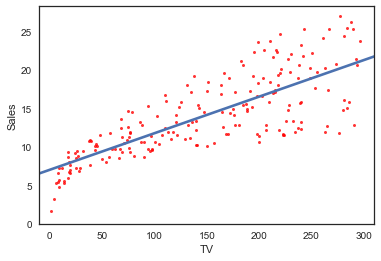

In [14]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

#### Visualizations using plotly

We'll repeat the same with another library called plotly. This is an interactive plotting library.

In [15]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = advertising.TV,
    y = advertising.Sales,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

## Visualizations with BQPlot

Let us do an interactive visualization of the scatterplot to see how TV Advertising affects the Sales, using another library called BQPlot with some interactivity.
Select some outliers visually and print them.

In [16]:
from __future__ import print_function
from bqplot import *
import numpy as np
import pandas as pd
from ipywidgets import Layout

x_sc = LinearScale()
y_sc = LinearScale()

x_data = np.arange(20)
y_data = np.random.randn(20)

scatter_chart = Scatter(x=advertising.TV, y=advertising.Sales, scales= {'x': x_sc, 'y': y_sc}, colors=['dodgerblue'],
                       interactions={'click': 'select'},
                        selected_style={'opacity': 1.0, 'fill': 'DarkOrange', 'stroke': 'Red'},
                       unselected_style={'opacity': 0.5})

ax_x = Axis(scale=x_sc)
ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f')

Figure(marks=[scatter_chart], axes=[ax_x, ax_y])

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale(), tick_format='0.2f')]…

In [17]:
#If you need to find out the visually selected points and print them as array, you could use .selected attribute.
scatter_chart.selected

[]

That's pretty cool!

Let us get to some serious stuff now.

##  Linear Regression Using sklearn library

scikit-learn or sklearn is a python library that provides some built-in machine learning algorithms. We could simply import the library and start using the algorithms in our code with our datasets. 
If you remember from the first step, we had already imported sklearn and statsmodels (another useful library for statistics and machine learning.)


```python
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
```

Before we use the ML algorithms to train the model, we need to prepare the data. We can call this as train dataset.
We simply prepare the predictors or the input vectore, let's say, 'X'. 
Also we prepare the labels for these input vector, and call it 'y'. Since we already know these labels, we can use these in combination with input vector to train the model.  

The next step is to fit the model with our data. We use the LinearRegression.fit(X,y) method. This step is called training the model.

###  Regression coefficients - RSS

Some of the important concepts or metrics of linear regression are the co-efficients and intercepts. Do you remember from the very first topic at the top, the equation Y = w*x + b ? The 'w' slope is the coefficient and 'b' is intercept. You can get them from the regression model 'regr' in the below code.

In [18]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[ 0.04753664]


In [19]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

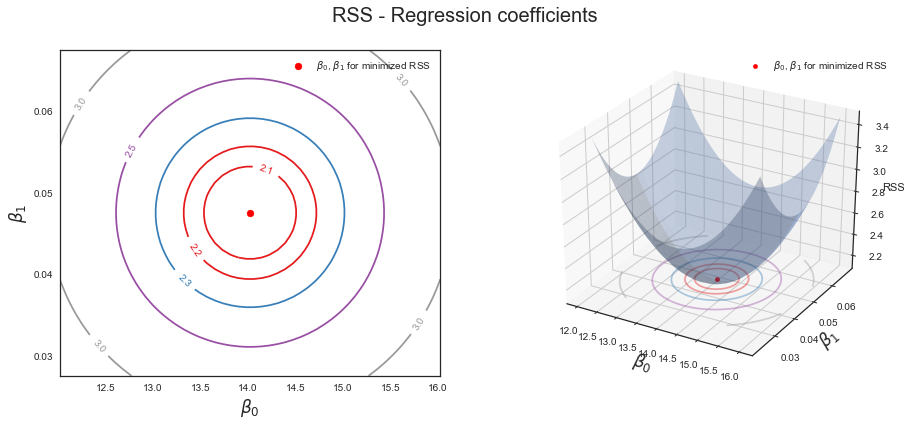

In [20]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

## Statsmodels 

Let us use statsmodels now for training the sales vs advertisement spends. Here we use statsmodel's ols() which stands for Ordinary Least Squares. Read the code below for some details on training regression models using statsmodels library.

In [21]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313506

###  Scikit-learn Again

Let's do sklearn again with Sales Vs TV.

R2 score is called r-squared. This is a parameter of the model to tell us how well the predictor variable predicts the target variable. This value is between 0 and 1, with a value close to 1 indicating that the predictor is well correlated.

In [43]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.03259354913
[ 0.04753664]


In [44]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.61187505085007099

### Interactive Outlier Analysis using bqplot

Next up, we will plot the regression line for TV Vs Sales, Then move some outliers around to see how it impacts the regression line. This would give us an idea if we need to remove some outliers to get a more consistent model with the general direction of the data.

In [25]:
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa
import bqplot as bq
from IPython.display import display
import ipywidgets as widgets

print('ipywidgets version', widgets.__version__)
print('bqplot version', bq.__version__)
def update_line(change):
    # create line fit to data and display equation
    lin.x = [np.min(scat.x), np.max(scat.x)]
    poly = np.polyfit(scat.x, scat.y, 1)
    lin.y = np.polyval(poly, lin.x)
    label.value = 'y = {:.2f} + {:.2f}x'.format(poly[1], poly[0])   
    
# create initial data set
size = 10
np.random.seed(0)
x_data = advertising.TV 
y_data = advertising.Sales 

# set up plot elements
sc_x = bqs.LinearScale()
sc_y = bqs.LinearScale()
ax_x = bqa.Axis(scale=sc_x)
ax_y = bqa.Axis(scale=sc_y, tick_format='0.2f', orientation='vertical')

# place data on scatter plot that allows point dragging
scat = bqm.Scatter(x=x_data, 
                   y=y_data, 
                   scales={'x': sc_x, 'y': sc_y}, 
                   enable_move=True)
# set up callback
scat.observe(update_line, names=['x', 'y'])

# linear fit line
lin = bqm.Lines(scales={'x': sc_x, 'y': sc_y})
# equation label
label = widgets.Label()
# containers
fig = bq.Figure(marks=[scat, lin], axes=[ax_x, ax_y])
box = widgets.VBox([label, fig])

# initialize plot and equation and display
update_line(None)
display(box)

ipywidgets version 7.2.1
bqplot version 0.10.5


##  Multiple Linear Regression

###  Statsmodels

Let us start by including two separate variables (Radio and NewsPaper) in two different models.

In [26]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [27]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Statsmodels

Now let us including the two variables (Radio and NewsPaper) together in a single model.

In [28]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 14 Aug 2018   Prob (F-statistic):           1.58e-96
Time:                        20:34:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Correlation Matrix

Correlation matrix tabulates the predictor variables against the target variable to see how well the variables are correlated. A value of 1 indicates full correlation. Note, if two predictor variables are correlated (or collinear) then it does not make sense to use both of them as input. We might as well remove one of them. 

In [29]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


###  Multiple Linear Regression

Let us do a multiple regression using sklearn.


In [30]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].as_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

regr_model = regr

def predict(tv, radio):
    data = pd.DataFrame({'TV': [tv], 'Radio': [radio]})
    return regr_model.predict(data)

#prediction = predict(advertising[['TV','Radio']])
prediction = predict(180.8,10.8)
print(prediction)

[ 0.18799423  0.04575482]
2.92109991241
[ 13.22390813]


### 3-D visualization using Matplotlib

Let us perform a 3-d visualization of the hyperplane using matplotlib. Here are the steps:

1. First let us draw thw axes and mark the min and max range of predictors.
2. Then shade the area  that would be forming the hyperplane
3. Elevate and tilt the hyperplane according to the intercept and regression coefficients.

This involves bit of python coding as below.

In [31]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [32]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

# Here is the place where we tilt and elevate the hyperplane
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

intercept_value = regr.intercept_
coef_value = regr.coef_
        
def get_zvalue(radio_max,tv_max):
    
    # Create a coordinate grid
    radio_range = max(50,int(round(radio_max)))
    tv_range = max(300, int(round(tv_max)))
    
    Radio = np.arange(0,radio_range)
    TV = np.arange(0,tv_range)
    
    B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
    Z1 = np.zeros((TV.size, Radio.size))

    # Here is the place where we tilt and elevate the hyperplane
    for (i,j),v in np.ndenumerate(Z1):
            Z1[i,j] =(intercept_value + B1[i,j]*coef_value[0] + B2[i,j]*coef_value[1])

    return Z1

Z2 = get_zvalue(0,0)

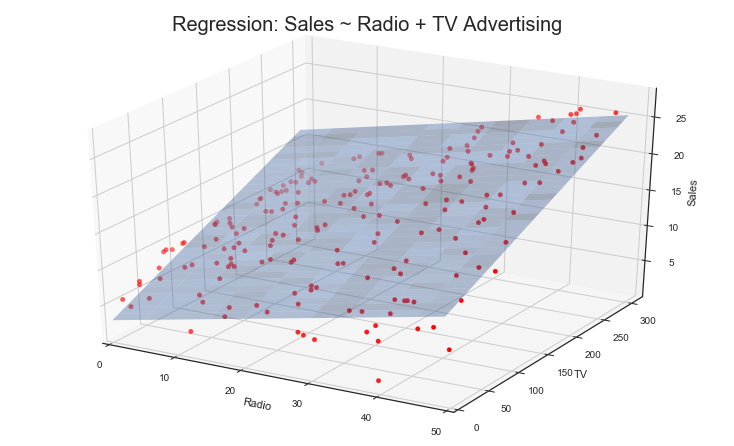

In [33]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z2, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

###  Interaction Variables

In [34]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### Non-linear relationships

So far we have seen, linear relationships between predictors and target variables.

In reality, this may not be the case. The relationships are often non-linear. It could be polynomial relationship of degress 2, 3 or more. A polynomial of 2nd degree can be represented as Y = w2*(X^2) + w1*X + b (X-squared). Similarly 3rd degree polynomial has a factor of X-cubed.

We can visualize these polynomials using seaborn's regplot. Note order=2 or order=5 for representing 2nd degree and 5th degree polynomials respectively. 

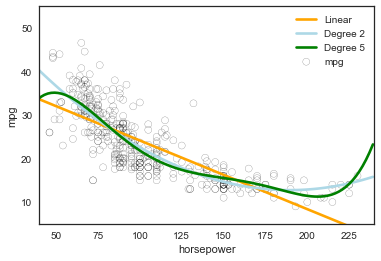

In [45]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [36]:
# Scientific libraries
from numpy import arange,array,ones
from scipy import stats


xi = arange(0,9)
A = array([ xi, ones(9)])

# (Almost) linear sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(auto.horsepower,auto.mpg)
line = slope*auto.horsepower+intercept
print(slope)
print(intercept)

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x = auto.horsepower,
                  y = auto.mpg,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=auto.horsepower,
                  y=line,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

#annotation = go.Annotation(
#                  x=3.5,
#                  y=23.5,
#                  text='$R^2 = 0.9551,\\Y = 0.716X + 19.18$',
#                  showarrow=False,
#                  font=go.Font(size=16)
#                  )
layout = go.Layout(
                title='Linear Fit in Python',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)')
#                  annotations=[annotation]
                )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Linear-Fit-in-python')

-0.157844733354
39.9358610212


In [37]:
# Generated linear fit
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(advertising.TV,advertising.Sales)
line2 = slope2*advertising.TV+intercept2

### Using a Polynomial relationship of 2nd Degree

In [38]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [39]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


### Plotting the residuals

In [40]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

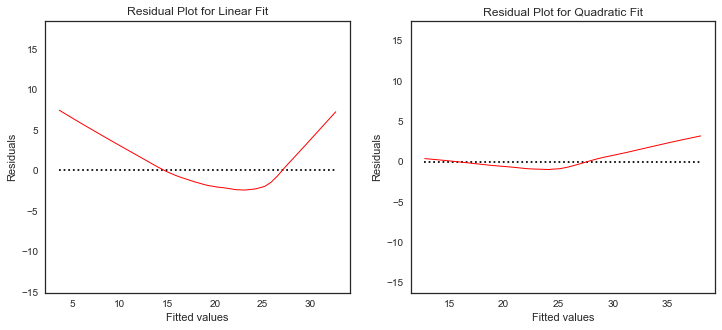

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

## Front End App to test Regression

In [42]:
from IPython import display
from IPython.display import IFrame
url = 'https://colaberry-dash-datadoc1.herokuapp.com/'
IFrame(url, width=1600, height=600)